<h1 style="font-size:40px;"> Poisonous OR NOT Poisonous Mushroom <h1>

# STEP 1: IMPORT DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.


## Loading the Data

In [2]:
train_path = '/Users/sophie/Desktop/mushroom_images/Training'
valid_path = '/Users/sophie/Desktop/mushroom_images/Validation'
test_path = '/Users/sophie/Desktop/mushroom_images/Test'

image_gen = ImageDataGenerator(rescale= 1. /255) # create a data generator rescale= 1. /255

training_generator = image_gen.flow_from_directory(
    train_path,
    classes=['non_poisonous', 'poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size= 2696
)
validation_generator = image_gen.flow_from_directory(
    valid_path,
    classes=['non_poisonous', 'poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=580
)

test_generator = image_gen.flow_from_directory(
    test_path,
    classes=['non_poisonous', 'poisonous'],
    class_mode='binary',
    target_size=(256, 256),
    batch_size=580
)

X_train, y_train = training_generator.next()
print(f'This is the X_train: Batch shape=%s, min=%.3f, max=%.3f' % (X_train.shape, X_train.min(), X_train.max()))

X_validation, y_validation = validation_generator.next()
print(f'This is the X_validation: Batch shape=%s, min=%.3f, max=%.3f' % (X_validation.shape, X_validation.min(), X_validation.max()))


X_test, y_test = test_generator.next()
print(f'This is the X_test: Batch shape=%s, min=%.3f, max=%.3f' % (X_test.shape, X_test.min(), X_test.max()))
print(y_test)


Found 962 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
This is the X_train: Batch shape=(962, 256, 256, 3), min=0.000, max=1.000
This is the X_validation: Batch shape=(206, 256, 256, 3), min=0.000, max=1.000
This is the X_test: Batch shape=(206, 256, 256, 3), min=0.000, max=1.000
[1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]


# STEP 2: VISUALIZE DATA

In [3]:
# this function plots the images according to the customed height & width and the preferred amount
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# By Dr Ryan Ahmed Referenced at the bottom 

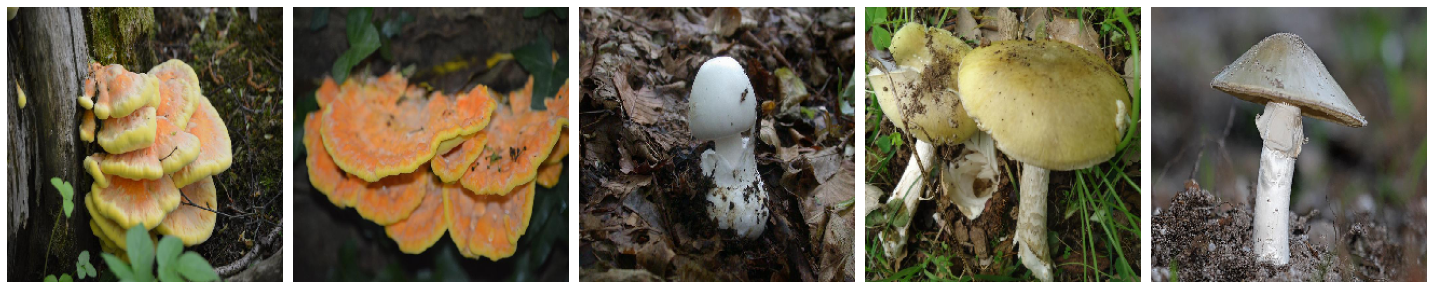

[0. 0. 1. 1. 1.]


In [4]:
plotImages(X_train)
print(y_train[:5])

### 0 = Not Poisonous and 1 = Poisonous

# STEP 3: DATA PREPARATION

In [5]:
# get the shape without the sampling
Input_shape = X_train.shape[1:]
Input_shape

(256, 256, 3)

# STEP 4: TRAIN THE MODEL

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

**Dropout** is a type of regularization. Regularization helps reduce over fitting. 

Dropout momentarily (in a batch of input data) switches off some neurons in a layer so that they do not contribute any information or learn any information during those updates, and the onus falls on other active neurons to learn harder and reduce the error.

In [7]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=64, activation='relu'))

cnn_model.add(Dense(units=32, activation='relu'))

cnn_model.add(Dense(units=2, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
average_pooling2d_1 (Average (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_2 (Average (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)           

In [8]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics =['accuracy'])

In [9]:
history = cnn_model.fit(X_train,
                        y_train,
                        nb_epoch=25,
                        batch_size=1,
                        verbose=1,
                        validation_data = (X_validation,y_validation))

/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 962 samples, validate on 206 samples
Epoch 1/25
962/962 [==============================] - 153s 160ms/step - loss: 0.4499 - accuracy: 0.7786 - val_loss: 0.4203 - val_accuracy: 0.7961
Epoch 2/25
962/962 [==============================] - 144s 149ms/step - loss: 0.2962 - accuracy: 0.8721 - val_loss: 0.3374 - val_accuracy: 0.8447
Epoch 3/25
962/962 [==============================] - 159s 165ms/step - loss: 0.2563 - accuracy: 0.9002 - val_loss: 0.3154 - val_accuracy: 0.8592
Epoch 4/25
962/962 [==============================] - 148s 154ms/step - loss: 0.1977 - accuracy: 0.9241 - val_loss: 0.3045 - val_accuracy: 0.8641
Epoch 5/25
962/962 [==============================] - 139s 144ms/step - loss: 0.1602 - accuracy: 0.9439 - val_loss: 0.3281 - val_accuracy: 0.8544
Epoch 6/25
962/962 [==============================] - 139s 145ms/step - loss: 0.1317 - accuracy: 0.9501 - val_loss: 0.2655 - val_accuracy: 0.8689
Epoch 7/25
962/962 [==============================] - 143s 149ms/step - loss: 

# STEP 5: EVALUATE THE MODEL

In [10]:
score = cnn_model.evaluate(X_test, y_test,verbose=0)
print(score)

[0.523983433028882, 0.8980582356452942]


In [11]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8981


In [12]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

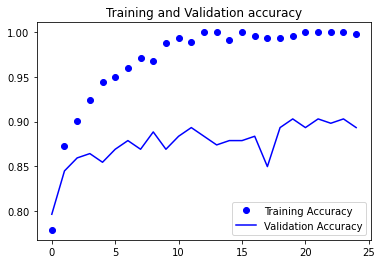

In [13]:
accuracy_cnn = history.history['accuracy']
val_accuracy_cnn = history.history['val_accuracy']

loss_cnn = history.history['loss']
val_loss_cnn = history.history['val_loss']

epochs_cnn = range(len(accuracy_cnn))

plt.plot(epochs_cnn, accuracy_cnn, 'bo', label='Training Accuracy')
plt.plot(epochs_cnn, val_accuracy_cnn, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

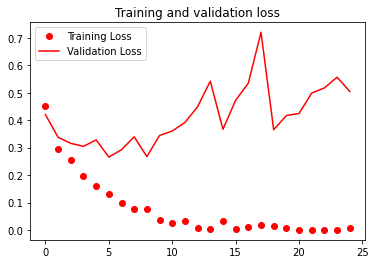

In [14]:
plt.plot(epochs_cnn, loss_cnn, 'ro', label='Training Loss')
plt.plot(epochs_cnn, val_loss_cnn, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
y_predict = cnn_model.predict(X_test)
y_pred = y_predict[:,1]

In [16]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
print(predicted_classes)
#get the indices to be plotted
print(y_test)

[1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0
 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0]
[1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 

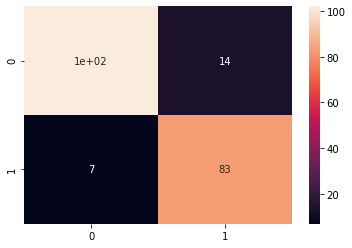

In [17]:
# showing the confusion matrix of the original CNN model 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True)

In [18]:
cm_df = pd.DataFrame(cm)

In [19]:
# labelling the confusion matrix to make easier to understand 
cm_df.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
cm_final_df = cm_df.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
cm_final_df

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,102,14
Actually Poisonous,7,83


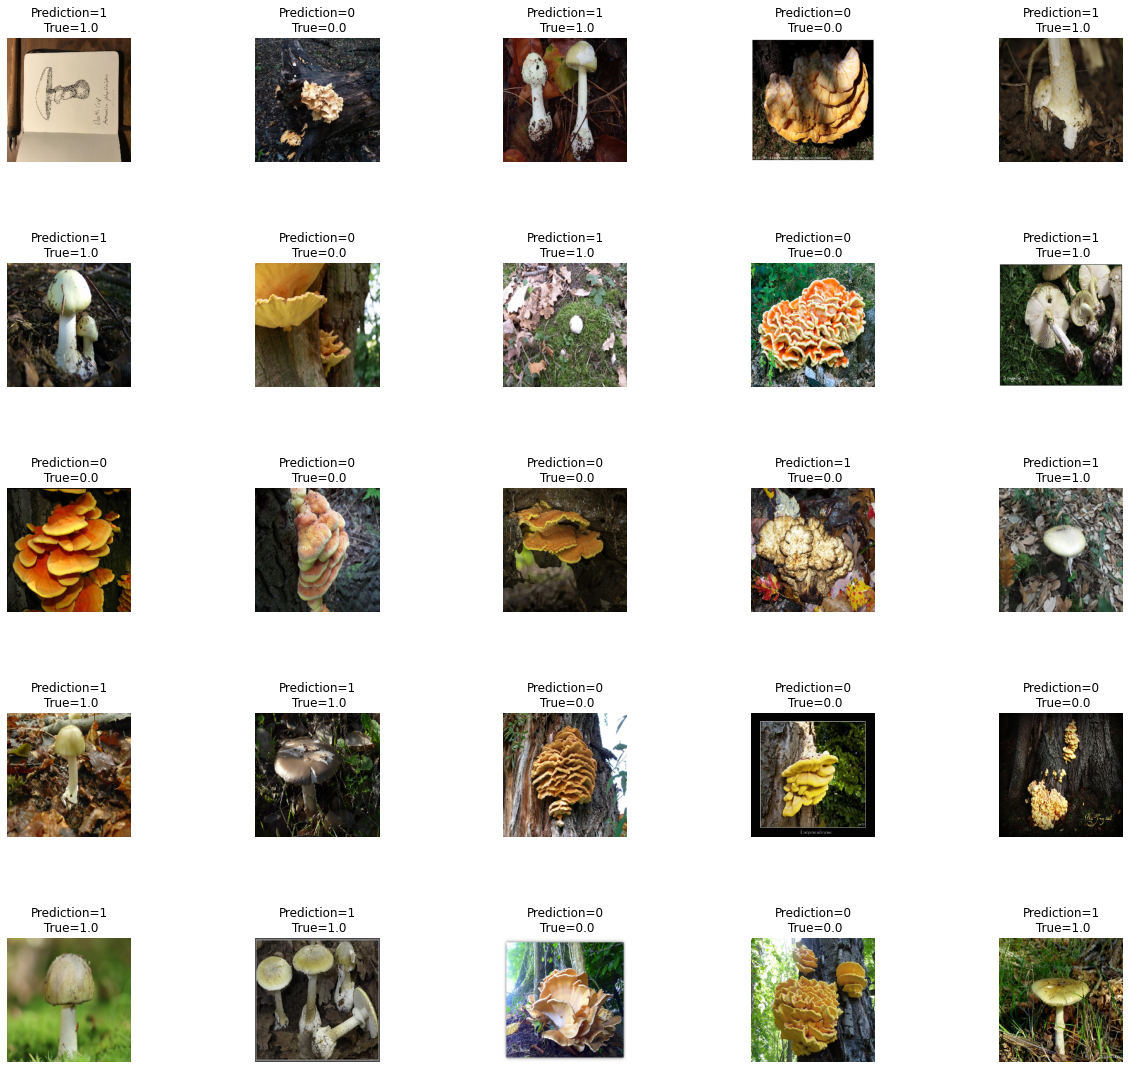

In [20]:
# This display 5 by 5 images showing the class the models predict and the class the image actually belongs to
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
# By Dr Ryan Ahemd 
# Drawings of mushrooms are accepted in my model 

# STEP 6: CHANGING THE THRESHOLD

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [22]:
precision_score(y_test, predicted_classes)

0.8556701030927835

**Precision answers the question**: How correct am I predicting poisonous mushrooms? produces no false positives has a precisions of 1

In [23]:
recall_score(y_test, predicted_classes)

0.9222222222222223

**Recall answers the question**: Out of all the poisonous mushrooms what is the amount of poisonous mushrooms that predicted correctly? produces no false negatives has a recall of 1

In [24]:
f1_score(y_test, predicted_classes)

0.8877005347593583

**F1**: It is the weighted average of precision and recall. It takes both false positives and false negatives into account. It is an overall measure of a model's accuracy that combiens precisiona nd recall. 

**Formula**: 
F1 = 2 * (precision * recall)/(precision + recall)


**For Below:**
Trying to eliminate false negatives, as a result, it will increase my false positives. I do this by lowering the threshold to 20%. Hence, if it has a 20% chance or more being poisonous, I would label it as poisonous rather than more than 50%.

In [25]:
# Make probabilistic predictions for the X test data
y_proba = cnn_model.predict_proba(X_test)[:,1]

# Precision and Recall using the default cut off at 0.5
y_threshold = np.where(y_proba > 0.5, 1, 0)
print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")
print("")

# The default cut off is lower at 0.2 
y_threshold = np.where(y_proba > 0.2, 1, 0)
print("Threshold of 0.2:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Threshold of 0.5:
Precision score: 0.8556701030927835
Recall score: 0.9222222222222223

Threshold of 0.2:
Precision score: 0.8316831683168316
Recall score: 0.9333333333333333


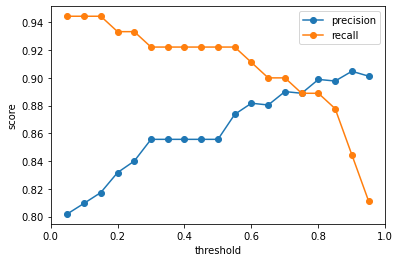

In [26]:
from sklearn.metrics import accuracy_score

thresholds = np.arange(0.05, 1, 0.05)

precisions = list()
recalls = list()

for threshold in thresholds:

    y_threshold = np.where(y_proba > threshold, 1, 0)
    
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)

    precisions.append(precision)
    recalls.append(recall)

# Visualize the result
plt.figure()
plt.plot(thresholds, precisions, label='precision', marker='o')
plt.plot(thresholds, recalls, label='recall', marker='o')
plt.xlim(0, 1)
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

It looks like if I want to find an optimal threshold to maximize the precision and recall, I should have a cut off value of around 0.81. 

The first few times I ran my results, the data was a bit different than the one I have now. 

## Confusion Matrix with the Changed Threshold

In [35]:
y_pred2 = np.where(y_pred >= 0.2, 1, 0)

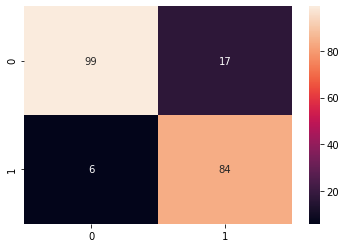

In [36]:
change_threshold_cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize = (6,4))
sns.heatmap(change_threshold_cm, annot=True)

In [37]:
threshold_df = pd.DataFrame(change_threshold_cm)

In [38]:
threshold_df.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
threshold_final_df = threshold_df.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
threshold_final_df

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,99,17
Actually Poisonous,6,84


# STEP 7: MODEL AUGMENTATION

**Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, shifting, changing the brightness and rotating the original images.**


In [39]:
X_train_aug = X_train.astype('float32')
X_test_aug = X_test.astype('float32')
X_validation_aug = X_validation.astype('float32')

In [40]:
X_train_aug.shape

(962, 256, 256, 3)

# DATA VISUALIZATION FOR AUGMENTED IMAGES

In [41]:
# n represents 10 images for each batch
n = 10

X_train_sample_aug = X_train_aug[:n]

In [42]:
X_train_sample_aug.shape

(10, 256, 256, 3)

In [43]:
aug_train = ImageDataGenerator(rotation_range=90)
aug_train.fit(X_train_sample_aug)

In [44]:
from keras.preprocessing.image import array_to_img

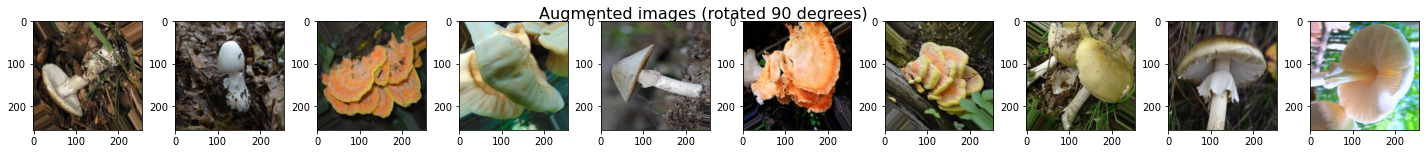

In [45]:
# Displaying rotating images for each batch from x train
fig = plt.figure(figsize = (25,2))
for x_batch in aug_train.flow(X_train_sample_aug, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(array_to_img(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)', fontsize=16)
     plt.show()
     break;
    
# Partially by Dr Ahmed and the rest of it I altered it to my liking 

# MODEL TRAINING WITH THE AUGMENTED DATASET

In [46]:
aug_gen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True
                             )

In [47]:
aug_gen.fit(X_train)

In [48]:
history_aug = cnn_model.fit_generator(aug_gen.flow(X_train_aug, y_train, batch_size = 1), epochs = 6, validation_data = (X_validation_aug,y_validation))

Epoch 1/6
962/962 [==============================] - 158s 164ms/step - loss: 0.3164 - accuracy: 0.9012 - val_loss: 0.2621 - val_accuracy: 0.9029
Epoch 2/6
962/962 [==============================] - 156s 162ms/step - loss: 0.2541 - accuracy: 0.9023 - val_loss: 0.2581 - val_accuracy: 0.9029
Epoch 3/6
962/962 [==============================] - 153s 159ms/step - loss: 0.2351 - accuracy: 0.9012 - val_loss: 0.2011 - val_accuracy: 0.9175
Epoch 4/6
962/962 [==============================] - 153s 159ms/step - loss: 0.2274 - accuracy: 0.9106 - val_loss: 0.2076 - val_accuracy: 0.9223
Epoch 5/6
962/962 [==============================] - 157s 163ms/step - loss: 0.2220 - accuracy: 0.9044 - val_loss: 0.2192 - val_accuracy: 0.9126
Epoch 6/6
962/962 [==============================] - 147s 153ms/step - loss: 0.2048 - accuracy: 0.9179 - val_loss: 0.2145 - val_accuracy: 0.9320


In [49]:
history_aug.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [50]:
val_accuracy_aug = history_aug.history['val_accuracy']

In [62]:
epochs_aug = range(len(val_accuracy_aug))

In [ ]:
# putting it into a Dataframe so I could use it for the presentation 
model_compare = pd.DataFrame({'Validation Accuracy CNN':val_accuracy_cnn, 'Validation Accuracy Augmentation':val_accuracy_aug, 'Epochs':epochs_aug})

In [ ]:
model_compare.to_csv('/Users/sophie/Desktop/compare_model.csv')

# AUGMENTED MODEL EVALUATION 

In [63]:
score = cnn_model.evaluate(X_test_aug, y_test)
print('Test accuracy', score[1])

206/206 [==============================] - 4s 18ms/step
Test accuracy 0.917475700378418


In [64]:
predicted_classes_aug = cnn_model.predict_classes(X_test_aug)

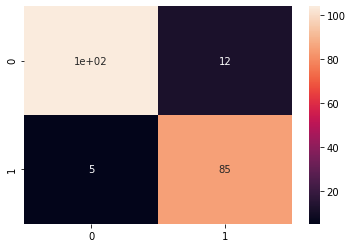

In [65]:
aug_cm_eva = confusion_matrix(y_test, predicted_classes_aug)
plt.figure(figsize = (6,4))
sns.heatmap(aug_cm_eva, annot=True)

In [82]:
augmentation_df = pd.DataFrame(aug_cm_eva)

In [83]:
augmentation_df.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
augmentation_df_final = augmentation_df.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
augmentation_df_final

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,104,12
Actually Poisonous,5,85


# STEP 8: VGG16 MODEL

VGG16 is a part of the convolution neural network architecture. It has a lot of hyper-parameters that is notorious for having convolution layers of 3 by 3 filter with a stride 1 and follows with a max pool layer of 2 by 2 filter of stride 2. The arrangement is the same throughout the entire architecture and ends with 2 fully connected layers, then a softmax for the output. It has 16 layers that have weights and it is very hefty network with painstaking running time. 

The pre-trained has all the hyper-parameters set; I only have to change it to sequential and altered the output to 2. 

**This is what a VGG16 models look like architecturely.**

<img src="https://miro.medium.com/max/940/1*3-TqqkRQ4rWLOMX-gvkYwA.png" width=400px>

# PULLING DOWN THE MODEL FROM THE LIBRARY 

In [67]:
#Keras has a library of pre-trained model able to pull down for fine tuning 
vgg16_model = keras.applications.vgg16.VGG16()
# by DeepLizard 

In [68]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**The last layer has 1000 layers and I will not classifying on 1000 categories. My model will only have 2 categories.**

In [69]:
vgg16_model.layers.pop()

In [70]:
# Sequential
new_model = keras.Sequential() 
for layer in vgg16_model.layers: # iterate all throughout the VGG Model and add the sequential layer to it
    new_model.add(layer)

In [71]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [76]:
# exclude from future training, good for fine tuning - exactly how they are in terms of their weight 
for layer in vgg16_model.layers:
    layer.trainable = False 

In [77]:
new_model.add(Dense(2, activation='softmax'))

In [78]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# TRAIN THE FINE-TUNED NEW_MODEL 

In [79]:
train_path = '/Users/sophie/Desktop/mushroom_images/Training'
valid_path = '/Users/sophie/Desktop/mushroom_images/Validation'
test_path = '/Users/sophie/Desktop/mushroom_images/Test'

image_gen = ImageDataGenerator() # create a data generator rescale= 1. /255

train_batches = image_gen.flow_from_directory(
    train_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=25 # change this to a smaller number for plotting such as 20
)
validation_batches = image_gen.flow_from_directory(
    valid_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=8 # change this to a smaller number when plotting also around 20 for visibility 
)

test_batches = image_gen.flow_from_directory(
    test_path,
    classes=['poisonous', 'non_poisonous'],
    target_size=(224, 224),
    batch_size=206 # change this to a lower number for plotting 
)

Found 962 images belonging to 2 classes.
Found 206 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


In [80]:
new_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
history_new = new_model.fit_generator(train_batches,
                        steps_per_epoch=38,
                        validation_data = validation_batches,
                        validation_steps=25,
                        epochs=1,
                        verbose=1)

Epoch 1/1
38/38 [==============================] - 348s 9s/step - loss: 0.5488 - accuracy: 0.7364 - val_loss: 0.5257 - val_accuracy: 0.8700


Something happened to my computer, I had to re-run the model again, and I only have time to run one-epoch. Around 6 epochs, it should show a validation accuracy around 93 - 95%. 

In [84]:
history_new.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [85]:
val_accuracy_new = history_new.history['val_accuracy']

In [87]:
new_df = pd.DataFrame({'epochs':[1], 'Validation Accuracy VGG': val_accuracy_new})

In [88]:
new_df.to_csv('/Users/sophie/Desktop/new_model.csv')

# FINE-TUNED MODEL EVALUATION 

In [89]:
X_test_new, y_test_new = next(test_batches)

In [90]:
def plotImages2(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img = np.array(img).astype(np.uint8)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
# By Dr Ahmed 

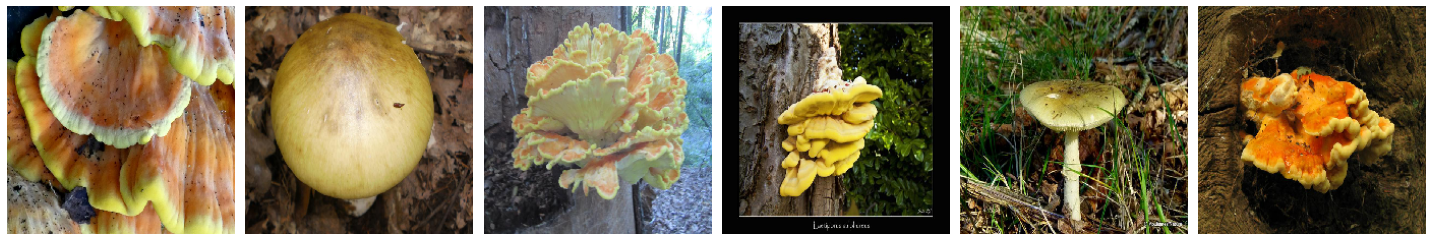

[0. 1. 0. 0. 1. 0.]


In [91]:
plotImages2(X_test_new)
y_test2 = y_test_new[:,0]
print(y_test2[:6])

### 0 is not poisonous and 1 is poisonous

In [92]:
print(y_test2)

[0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [93]:
score = new_model.evaluate(X_test_new, y_test_new,verbose=0)

In [94]:
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9126


In [95]:
predictions = new_model.predict_generator(test_batches, steps=1, verbose=0)

In [96]:
cm2 = confusion_matrix(y_test2, np.round(predictions[:,0]))

In [97]:
cm2

array([[111,   5],
       [ 13,  77]])

In [98]:
new_model_cm2 = pd.DataFrame(cm2)

In [99]:
new_model_cm2.columns = ['Predicted Not Poisonous', 'Predicted Poisonous']
cm2_df = new_model_cm2.rename(index={0: 'Actually Not Poisonous', 1: 'Actually Poisonous'})
cm2_df

,Predicted Not Poisonous,Predicted Poisonous
Actually Not Poisonous,111,5
Actually Poisonous,13,77


In [100]:
history_new.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

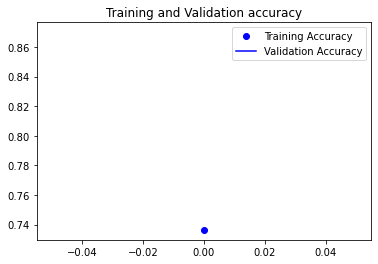

In [101]:
accuracy_new = history_new.history['accuracy']
val_accuracy_new = history_new.history['val_accuracy']
loss_new = history_new.history['loss']
val_loss_new = history_new.history['val_loss']

epochs_new = range(len(accuracy_new))

plt.plot(epochs_new, accuracy_new, 'bo', label='Training Accuracy')
plt.plot(epochs_new, val_accuracy_new, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

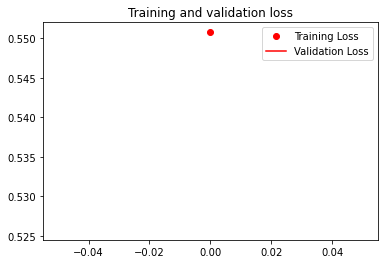

In [102]:
plt.plot(epochs_new, loss_new, 'ro', label='Training Loss')
plt.plot(epochs_new, val_loss_new, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## References 

**DeepLizard:** <a href="https://www.youtube.com/channel/UC4UJ26WkceqONNF5S26OiVw">Keras Deep Learning Neural Network</a></em></center> <br>
**Dr Ryan Ahmed:** <a href="https://www.udemy.com/user/ryan-ahmed/">Machine Learning Practical Workout</a></em></center>